In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
path_to_dir = '/home/zmaw/u301513/Documents/scr/phd/bicest/oceantracker/experiments/auxiliaries/chl_elbe/'

geesthacht = pd.read_csv(path_to_dir + 'geesthacht.csv', sep=';', decimal=',', parse_dates=[0], dayfirst=True)
seemanshoeft = pd.read_csv(path_to_dir + 'seemanshoeft.csv', sep=';', decimal=',', parse_dates=[0], dayfirst=True)
luehemuendung = pd.read_csv(path_to_dir + 'luehemuendung.csv', sep=';', decimal=',', parse_dates=[0], dayfirst=True)
grauerort = pd.read_csv(path_to_dir + 'grauerort.csv', sep=';', decimal=',', parse_dates=[0], dayfirst=True)
zollenspieker = pd.read_csv(path_to_dir + 'zollenspieker.csv', sep=';', decimal=',', parse_dates=[0], dayfirst=True)



In [7]:
# concat all dataframes
df_chlorophyll = pd.concat([geesthacht, seemanshoeft, luehemuendung, grauerort,zollenspieker], axis=0)

# remove '' surounding head names
df_chlorophyll.columns = df_chlorophyll.columns.str.strip("'")

# drop columns
to_drop = ['Gew�sser','Wasserk�rper','Aggregierte Messstellen','Erfassungsart','Erfassungsart','Status','Analysemethode','Bemerkung (Datenausgabe)','zus�tzliche Informationen','Messvorgang','Bezugsjahr','Datum bis','Zeit bis']
df_chlorophyll.drop(columns=to_drop, inplace=True)

# some of the "Messwert" values are below a threshold (e.g. "< 5")
# strip them of the "<", and convert to float
df_chlorophyll['Messwert'] = df_chlorophyll['Messwert'].str.strip('<')
df_chlorophyll['Messwert'] = df_chlorophyll['Messwert'].str.replace(',','.')
df_chlorophyll['Messwert'] = df_chlorophyll['Messwert'].astype(float)

# turn "Datum" to datetime
df_chlorophyll['Datum'] = pd.to_datetime(df_chlorophyll['Datum'], dayfirst=True)
df_chlorophyll

,Messstelle,Stromkilometer,Parameter,Messwert,Einheit,Messwerttyp,Messwertart,Datum,Zeit
0,"'Geesthacht (Strom-km 585,9)'",585.9,'Chlorophyll-A',6.0,'µg/l','quantitativ nachgewiesen','Einzelprobe',2008-01-09,13:05
1,"'Geesthacht (Strom-km 585,9)'",585.9,'Chlorophyll-A',5.0,'µg/l','quantitativ nachgewiesen','Einzelprobe',2008-02-06,14:54
2,"'Geesthacht (Strom-km 585,9)'",585.9,'Chlorophyll-A',19.0,'µg/l','quantitativ nachgewiesen','Einzelprobe',2008-03-05,13:40
3,"'Geesthacht (Strom-km 585,9)'",585.9,'Chlorophyll-A',49.0,'µg/l','quantitativ nachgewiesen','Einzelprobe',2008-04-09,16:10
4,"'Geesthacht (Strom-km 585,9)'",585.9,'Chlorophyll-A',110.0,'µg/l','quantitativ nachgewiesen','Einzelprobe',2008-05-14,13:00
...,...,...,...,...,...,...,...,...,...
427,"'Zollenspieker (Strom-km 598,7)'",598.7,'Chlorophyll-A',141.0,'µg/l','quantitativ nachgewiesen','Einzelprobe',2022-08-01,14:53
428,"'Zollenspieker (Strom-km 598,7)'",598.7,'Chlorophyll-A',125.0,'µg/l','quantitativ nachgewiesen','Einzelprobe',2022-08-29,14:05
429,"'Zollenspieker (Strom-km 598,7)'",598.7,'Chlorophyll-A',61.0,'µg/l','quantitativ nachgewiesen','Einzelprobe',2022-10-10,13:20
430,"'Zollenspieker (Strom-km 598,7)'",598.7,'Chlorophyll-A',6.0,'µg/l','quantitativ nachgewiesen','Einzelprobe',2022-11-09,12:26


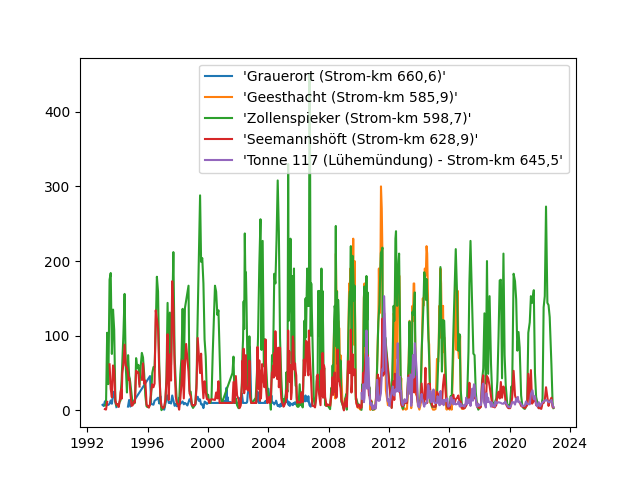

In [9]:
%matplotlib widget

# plot along time for grauerort

fig,ax = plt.subplots()

for messstelle in set(df_chlorophyll['Messstelle']):
    df_subset = df_chlorophyll[df_chlorophyll['Messstelle'] == messstelle]
    ax.plot(df_subset['Datum'], df_subset['Messwert'], label=messstelle)

ax.legend()
# xlim  from 2010 till 2024
# ax.set_xlim(pd.Timestamp('2010-01-01'), pd.Timestamp('2024-01-01'))



(14610.0, 19723.0)

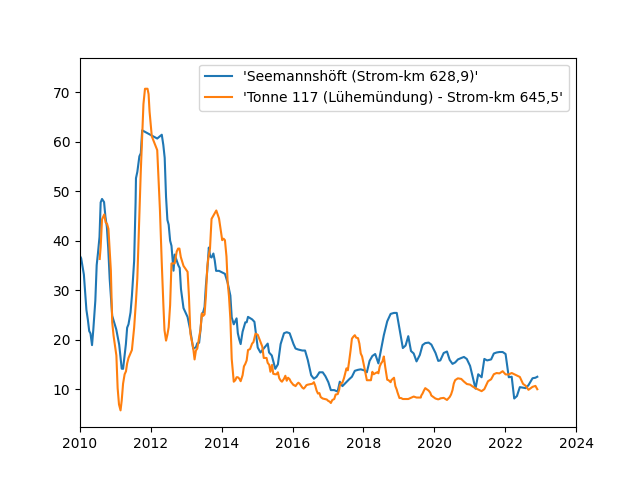

In [44]:
fig,ax = plt.subplots()

for messstelle in [ "'Seemannshöft (Strom-km 628,9)'", "'Tonne 117 (Lühemündung) - Strom-km 645,5'"]:
    df_subset = df_chlorophyll[df_chlorophyll['Messstelle'] == messstelle]
    # ax.plot(df_subset['Datum'], df_subset['Messwert'], label=messstelle)
    # moving average with a window lenght of 365 days
    ax.plot(df_subset['Datum'], df_subset['Messwert'].rolling(window=10).mean(), label=messstelle)

ax.legend()
# xlim  from 2010 till 2024
ax.set_xlim(pd.Timestamp('2010-01-01'), pd.Timestamp('2024-01-01'))

In [53]:
# bunthaus = pd.read_csv('dbe_gast_20221114_151817887.csv',delimiter=';',quotechar="'")
seemanshoeft = pd.read_csv('/home/zmaw/u301513/Documents/scr/phd/bicest/oceantracker/experiments/auxiliaries/turbidity_elbe/dbe_gast_20221114_152318863.csv',delimiter=';',quotechar="'")

df_turbidity = pd.concat([seemanshoeft])
df_turbidity['Stromkilometer'] = [float(item.replace(',','.')) for item in df_turbidity['Stromkilometer']]
df_turbidity['Messwert'] = [float(item.replace(',','.')) for item in df_turbidity['Messwert']]
df_turbidity['Datum'] = pd.to_datetime(df_turbidity['Datum'],format="%d.%m.%Y")

df_turbidity


,Gewässer,Wasserkörper,Messstelle,Stromkilometer,Parameter,Messwert,Einheit,Messwerttyp,Medium,Messwertart,Messvorgang,Datum,Bezugsjahr,Zeit,Datum bis,Zeit bis,Status,Analysemethode,Bemerkung (Datenausgabe),zusätzliche Informationen
0,Elbe,Hafen,"Seemannshöft (Strom-km 628,9)",628.9,Trübung (FNU),14.8,FNU,quantitativ nachgewiesen,Wasser - Gesamtprobe,Tagesmittelwert,kontinuierliche Messungen,1997-01-07,NaN,NaN,NaN,NaN,freigegeben,-,NaN,NaN
1,Elbe,Hafen,"Seemannshöft (Strom-km 628,9)",628.9,Trübung (FNU),13.6,FNU,quantitativ nachgewiesen,Wasser - Gesamtprobe,Tagesmittelwert,kontinuierliche Messungen,1997-01-08,NaN,NaN,NaN,NaN,freigegeben,-,NaN,NaN
2,Elbe,Hafen,"Seemannshöft (Strom-km 628,9)",628.9,Trübung (FNU),16.1,FNU,quantitativ nachgewiesen,Wasser - Gesamtprobe,Tagesmittelwert,kontinuierliche Messungen,1997-01-09,NaN,NaN,NaN,NaN,freigegeben,-,NaN,NaN
3,Elbe,Hafen,"Seemannshöft (Strom-km 628,9)",628.9,Trübung (FNU),18.2,FNU,quantitativ nachgewiesen,Wasser - Gesamtprobe,Tagesmittelwert,kontinuierliche Messungen,1997-01-10,NaN,NaN,NaN,NaN,freigegeben,-,NaN,NaN
4,Elbe,Hafen,"Seemannshöft (Strom-km 628,9)",628.9,Trübung (FNU),21.7,FNU,quantitativ nachgewiesen,Wasser - Gesamtprobe,Tagesmittelwert,kontinuierliche Messungen,1997-01-11,NaN,NaN,NaN,NaN,freigegeben,-,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7200,Elbe,Hafen,"Seemannshöft (Strom-km 628,9)",628.9,Trübung (FNU),68.2,FNU,quantitativ nachgewiesen,Wasser - Gesamtprobe,Tagesmittelwert,kontinuierliche Messungen,2021-12-27,NaN,NaN,NaN,NaN,freigegeben,DIN EN ISO 7027 (C2),NaN,NaN
7201,Elbe,Hafen,"Seemannshöft (Strom-km 628,9)",628.9,Trübung (FNU),84.5,FNU,quantitativ nachgewiesen,Wasser - Gesamtprobe,Tagesmittelwert,kontinuierliche Messungen,2021-12-28,NaN,NaN,NaN,NaN,freigegeben,DIN EN ISO 7027 (C2),NaN,NaN
7202,Elbe,Hafen,"Seemannshöft (Strom-km 628,9)",628.9,Trübung (FNU),89.2,FNU,quantitativ nachgewiesen,Wasser - Gesamtprobe,Tagesmittelwert,kontinuierliche Messungen,2021-12-29,NaN,NaN,NaN,NaN,freigegeben,DIN EN ISO 7027 (C2),NaN,NaN
7203,Elbe,Hafen,"Seemannshöft (Strom-km 628,9)",628.9,Trübung (FNU),83.5,FNU,quantitativ nachgewiesen,Wasser - Gesamtprobe,Tagesmittelwert,kontinuierliche Messungen,2021-12-30,NaN,NaN,NaN,NaN,freigegeben,DIN EN ISO 7027 (C2),NaN,NaN


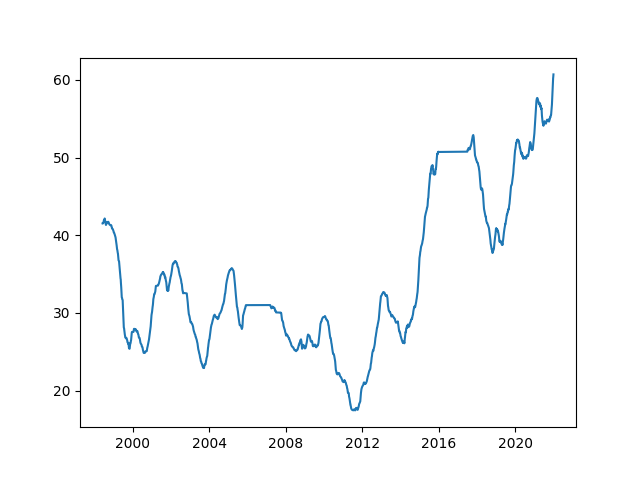

In [59]:
# test plot for turbidity
fig,ax = plt.subplots()

for messstelle in set(df_turbidity['Messstelle']):
    df_subset = df_turbidity[df_turbidity['Messstelle'] == messstelle]
    ax.plot(df_subset['Datum'], df_subset['Messwert'].rolling(window=500).mean(), label=messstelle)

In [ ]:
fig,ax = plt.subplots()

for messstelle in [ "'Seemannshöft (Strom-km 628,9)'", "'Tonne 117 (Lühemündung) - Strom-km 645,5'"]:
    df_subset = df_turbidity[df_turbidity['Messstelle'] == messstelle]
    # ax.plot(df_subset['Datum'], df_subset['Messwert'], label=messstelle)
    # moving average with a window lenght of 365 days
    ax.plot(df_subset['Datum'], df_subset['Messwert'].rolling(window=10).mean(), label=messstelle)

ax.legend()
# xlim  from 2010 till 2024
ax.set_xlim(pd.Timestamp('2010-01-01'), pd.Timestamp('2024-01-01'))

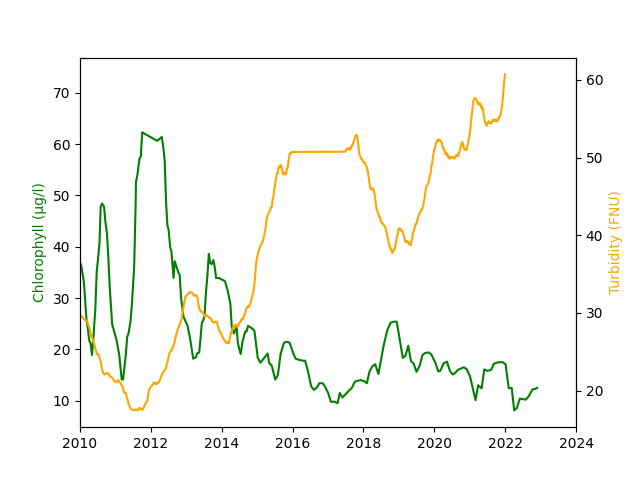

In [68]:
# creating figure with two y-axis
# first y-axis is chlorophyll, second y-axis is turbidity

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

# chlorophyll
for messstelle in [ "'Seemannshöft (Strom-km 628,9)'" ]:#, "'Tonne 117 (Lühemündung) - Strom-km 645,5'"]:
    df_subset = df_chlorophyll[df_chlorophyll['Messstelle'] == messstelle]

    ax1.plot(df_subset['Datum'], df_subset['Messwert'].rolling(window=10).mean(), label=messstelle,color='green')

# ylabel
ax1.set_ylabel('Chlorophyll (µg/l)', color='green')

# turbidity
for messstelle in set(df_turbidity['Messstelle']):
    df_subset = df_turbidity[df_turbidity['Messstelle'] == messstelle]
    ax2.plot(df_subset['Datum'], df_subset['Messwert'].rolling(window=500).mean(), label=messstelle,color='orange')


# ylabel
ax2.set_ylabel('Turbidity (FNU)', color='orange')

# xlim  from 2010 till 2024
ax1.set_xlim(pd.Timestamp('2010-01-01'), pd.Timestamp('2024-01-01'))

# savefig
fig.savefig('chl_turbidity.png',dpi=300)




In [ ]:
plt.figure(figsize=(20,10))
plt.grid(True)


plt.scatter(bunthaus['Datum'],bunthaus['Messwert'],label='bunthaus',s=5)
plt.scatter(seemanshoeft['Datum'],seemanshoeft['Messwert'],label='seemanshöft',s=5)
plt.legend()
plt.xlim(dstart,dend)
plt.ylabel('FNU')
plt.savefig('long_term_turbidiy.png')